# Rocket Launch

Plans for a rocket launch occur over the course of years. So, NASA might have to choose a time and date several years before launch. If you've ever seen your local weather person or meteorologist, you know that sometimes it's hard to accurately predict weather even hours in advance.

Because large amounts of data are now available, weather predictions are more accurate than in the past, even taking into account the changing climate. But the stakes during a rocket launch are very high. It's not just that the astronauts might get cold because they didn't know they should bring a jacket. If NASA schedules the launch on the wrong day, it can be life-threatening.

The data has fields like-

1. Conditions (cloudy, partly cloudy, fair, rain, thunder, heavy storm)
2. Temperature
3. Humidity
4. Wind speed
5. Wind direction
6. Precipitation
7. Visibility
8. Sea level
9. Pressure

In [1]:
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image 

In [2]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head(2)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN


In [3]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [4]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
Name                            60 non-null object
Date                            300 non-null datetime64[ns]
Time (East Coast)               59 non-null object
Location                        300 non-null object
Crewed or Uncrewed              60 non-null object
Launched?                       60 non-null object
High Temp                       299 non-null float64
Low Temp                        299 non-null float64
Ave Temp                        299 non-null float64
Temp at Launch Time             59 non-null float64
Hist High Temp                  299 non-null float64
Hist Low Temp                   299 non-null float64
Hist Ave Temp                   299 non-null float64
Percipitation at Launch Time    299 non-null float64
Hist Ave Percipitation          299 non-null float64
Wind Direction                  299 non-null object
Max Wind Speed                  299 non-null float6

In [5]:
## To handle missing values, we will fill the missing values with appropriate values 

launch_data['Launched?']=launch_data['Launched?'].fillna('N')

launch_data['Crewed or Uncrewed']=launch_data['Crewed or Uncrewed'].fillna('Uncrewed')

launch_data['Wind Direction']=launch_data['Wind Direction'].fillna('unknown')

launch_data['Condition']=launch_data['Condition'].fillna('Fair')

launch_data=launch_data.fillna(0)

In [6]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [7]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


# Data Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

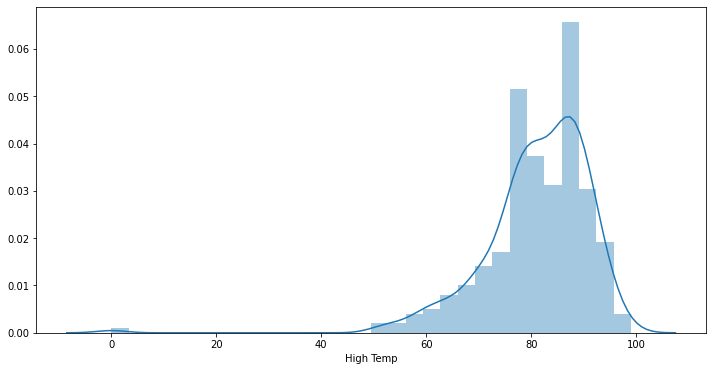

In [9]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["High Temp"])

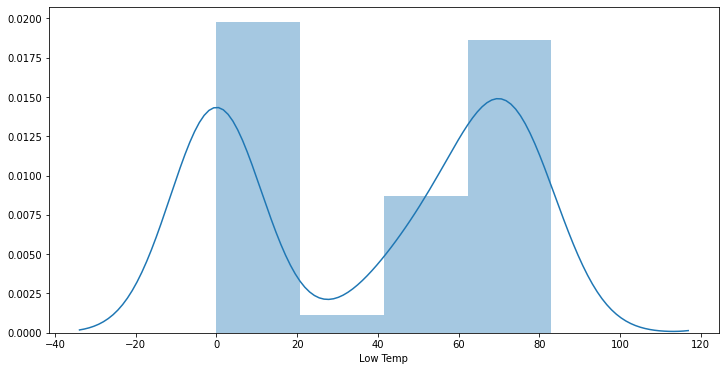

In [10]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["Low Temp"])

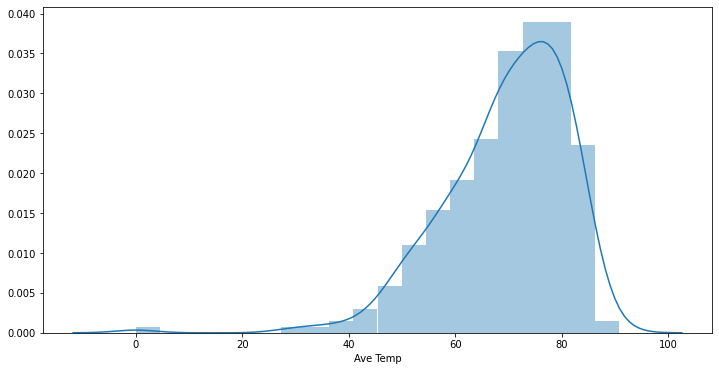

In [11]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["Ave Temp"])

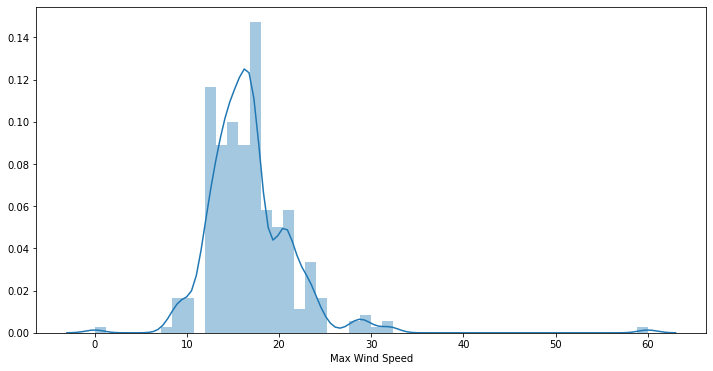

In [12]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["Max Wind Speed"])

In [13]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [14]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
Name                            300 non-null object
Date                            300 non-null datetime64[ns]
Time (East Coast)               300 non-null object
Location                        300 non-null object
Crewed or Uncrewed              300 non-null int32
Launched?                       300 non-null object
High Temp                       300 non-null float64
Low Temp                        300 non-null float64
Ave Temp                        300 non-null float64
Temp at Launch Time             300 non-null float64
Hist High Temp                  300 non-null float64
Hist Low Temp                   300 non-null float64
Hist Ave Temp                   300 non-null float64
Percipitation at Launch Time    300 non-null float64
Hist Ave Percipitation          300 non-null float64
Wind Direction                  300 non-null int32
Max Wind Speed                  300 non-null flo

In [15]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data=launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1)

# Saving the rest of the data as input data
X = launch_data

In [16]:
X

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.00,0.08,0,16.0,15.0,0.0,0
1,1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.00,0.09,0,14.0,10.0,0.0,0
2,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,2,15.0,10.0,11.0,0
3,1,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.00,0.08,1,10.0,10.0,0.0,6
4,1,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.00,0.09,0,12.0,10.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,87.0,71.0,79.36,0.0,87.0,70.0,79.0,0.00,0.15,4,20.0,10.0,0.0,9
296,1,86.0,72.0,79.50,0.0,88.0,70.0,79.0,0.01,0.16,5,18.0,10.0,0.0,1
297,0,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,5,16.0,10.0,7.0,1
298,1,87.0,72.0,79.70,0.0,88.0,70.0,79.0,0.46,0.16,0,13.0,10.0,0.0,0


In [17]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

In [18]:
y

0      N
1      N
2      Y
3      N
4      N
      ..
295    N
296    N
297    Y
298    N
299    N
Name: Launched?, Length: 300, dtype: object

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
Crewed or Uncrewed              300 non-null int32
High Temp                       300 non-null float64
Low Temp                        300 non-null float64
Ave Temp                        300 non-null float64
Temp at Launch Time             300 non-null float64
Hist High Temp                  300 non-null float64
Hist Low Temp                   300 non-null float64
Hist Ave Temp                   300 non-null float64
Percipitation at Launch Time    300 non-null float64
Hist Ave Percipitation          300 non-null float64
Wind Direction                  300 non-null int32
Max Wind Speed                  300 non-null float64
Visibility                      300 non-null float64
Wind Speed at Launch Time       300 non-null float64
Condition                       300 non-null int32
dtypes: float64(12), int32(3)
memory usage: 31.8 KB


In [20]:
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=7,max_depth=10,min_samples_split=2)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [22]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [23]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

['N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'N']


In [24]:
# Calculate accuracy
tree_model.score(X_test,y_test)

0.9833333333333333

In [25]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

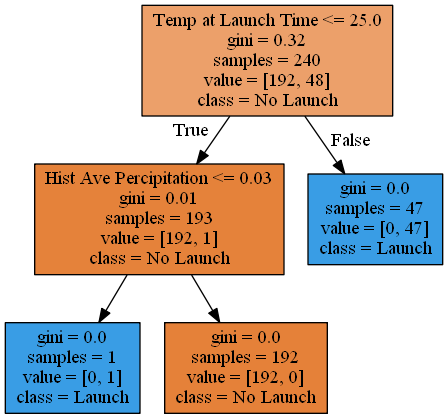

In [26]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

In [27]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2


In [28]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

array(['N'], dtype=object)